## Simple Linear Regression


### Importing packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Create our own data

In [2]:
datafile = pd.DataFrame()
datafile[0] = [45,32,37,28,22]
datafile[1] = [78,82,43,95,64]
datafile.columns =["CAT","FAT"]
print(datafile)

   CAT  FAT
0   45   78
1   32   82
2   37   43
3   28   95
4   22   64


## Checking Linearity


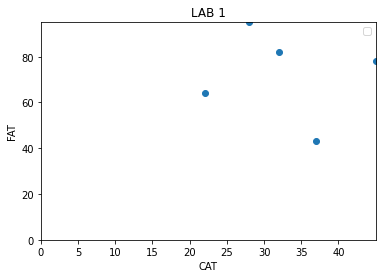

In [4]:
plt.scatter(datafile['CAT'],datafile['FAT'])
plt.title("LAB 1")
plt.xlim(0,45)
plt.ylim(0,95)
plt.xticks(np.arange(0,45,5))
plt.legend()
plt.xlabel("CAT")
plt.ylabel("FAT")
plt.show()

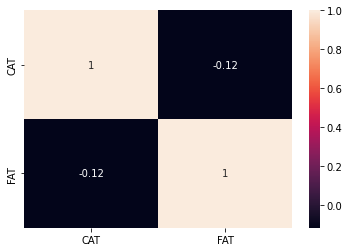

In [5]:
import seaborn as sb
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

### Modeling

In [6]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

train_x = np.asanyarray(datafile[['CAT']])
train_y = np.asanyarray(datafile[['FAT']])
#print(train_x)
#print(train_y)

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)


Coefficients:  [[-0.26271186]]
Intercept:  [81.01694915]


#### Plot outputs

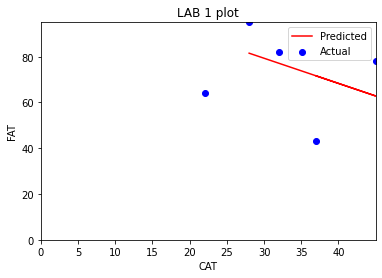

In [19]:
plt.scatter(datafile.CAT, datafile.FAT,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("LAB 1 plot")
plt.xlim(0,45)
plt.ylim(0,95)
plt.xticks(np.arange(0,45,5))
plt.legend()
plt.xlabel("CAT")
plt.ylabel("FAT")
plt.show()

In [12]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[78] [69.19491525]
[82] [72.61016949]
[43] [71.29661017]
[95] [73.66101695]
[64] [75.23728814]
[[69.19491525]
 [72.61016949]
 [71.29661017]
 [73.66101695]
 [75.23728814]]
   CAT  FAT  Predicted
0   45   78  69.194915
1   32   82  72.610169
2   37   43  71.296610
3   28   95  73.661017
4   22   64  75.237288


#### Performance measurement
Any of the following metrics may be used:
<ul>
    <li> Mean absolute error: It is the average of the absolute value of all the errors. </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. This is efficient since the focus is on large errors and doesnot consider sign of error.</li>
    <li> Root Mean Squared Error (RMSE): This is a metric to calculate the accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 15.813559322033896
Mean Squared Error: 309.6050847457626
Root Mean Squared Error: 17.595598448071115


In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(datafile[['CAT']])
test_y = np.asanyarray(datafile[['FAT']])
test_y_predicted = regress.predict(test_x)

print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 15.813559322033896
Mean square error (MSE):  309.6050847457626
R2-score: %.2f (RMSE): 0.013493867111386004


In [15]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(datafile[['CAT']], datafile[['FAT']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

from sklearn import linear_model
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

   CAT
2   37
0   45
3   28
Testing
   CAT
1   32
4   22
Coefficients:  [[-1.09907834]]
Intercept:  [112.29953917]


In [16]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

   CAT
1   32
4   22
   FAT
1   82
4   64
[[77.12903226]
 [88.11981567]]


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 14.495391705069125
Mean Squared Error: 302.74591730552777
Root Mean Squared Error: 17.399595320165574


In [18]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei